In [1]:
from copy import deepcopy
from random import shuffle

import numpy as np
from scipy.stats import entropy

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from infomercial.util import Distribution
from infomercial.discrete.value import information_value
from infomercial.discrete.value import entropy
from infomercial.discrete.value import mutual_information
from infomercial.discrete.value import kl_divergence
from infomercial.discrete.value import estimate_prob
from infomercial.discrete.value import delta_p

from infomercial.local_gym import BanditFourArmedDeterministicFixed

# Compare value metrics

In set of simuluted 4-arm bandit discrete distributions

In [2]:
# Sampling fns
def generate_obs(n0, n1, n2, n3):
    X = []
    X.extend([0] * n0)
    X.extend([1] * n1)
    X.extend([2] * n2)
    X.extend([3] * n3)
    shuffle(X)
    
    return X

## From uniform, to biased.

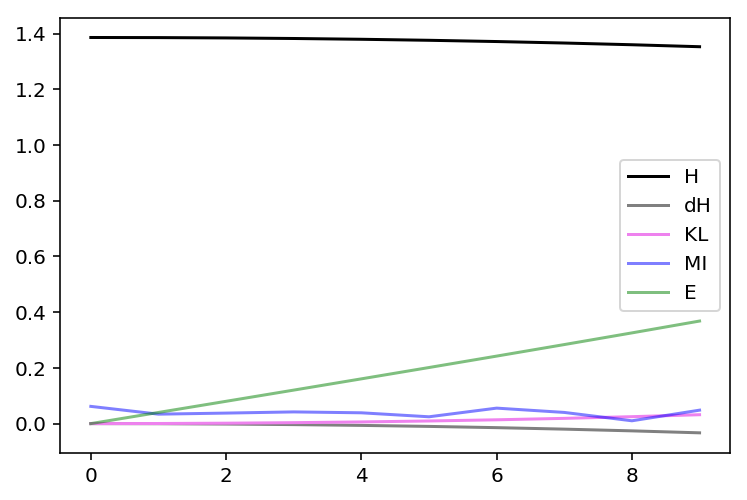

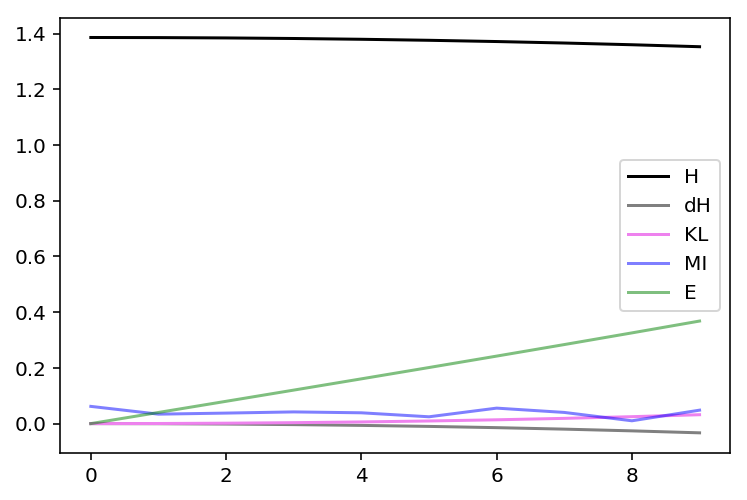

In [6]:
# Sim some chaning probs
N = 10
i = 1

# -
# Obs. init.
X = generate_obs(25, 25, 25, 25)

Y = []
d = [0, 0, 1]
for i in range(N):
    shuffle(d)
    y = generate_obs(25 - d[0]*i, 25 + i, 25 - d[1]*i, 25 - d[2]*i)
    Y.append(deepcopy(y))
    
# -
# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [information_value(X, y) for y in Y]

# -
obs = list(range(N))
plt.plot(obs, H, label='H', color="black")
plt.plot(obs, dH, label='dH', color="grey")
plt.plot(obs, KL, label='KL', color="violet")
plt.plot(obs, MI, label='MI', color="blue", alpha=0.5)
plt.plot(obs, E, label='E', color="green", alpha=0.5)
plt.legend();

In [4]:
MI

[0.027941541984665808,
 0.04685998396823532,
 0.047820960121172096,
 0.024153801177548395,
 0.039407446370607335,
 0.043877305685659174,
 0.11770224738787016,
 0.04241984714242708,
 0.04561922648941863,
 0.047452149264552546]

[0.027941541984665808,
 0.04685998396823532,
 0.047820960121172096,
 0.024153801177548395,
 0.039407446370607335,
 0.043877305685659174,
 0.11770224738787016,
 0.04241984714242708,
 0.04561922648941863,
 0.047452149264552546]

In [ ]:
X

# From biased to uniform

In [7]:
# Sim some chaning probs
N = 15
i = 1

# -
# Obs. init.
X = generate_obs(20, 40, 20, 20)

Y = []
d = [0, 0, 1]
for i in range(N):
    shuffle(d)
    y = generate_obs(20 + d[0]*i, 40 - i, 20 + d[1]*i, 25 + d[2]*i)
    Y.append(deepcopy(y))
    
# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(x) for x, y in zip(X, Y)]
MI = [mutual_information(x, y) for x, y in zip(X, Y)]
KL = [kl_divergence(x, y) for x, y in zip(X, Y)]
dP = [delta_p(x, y) for x, y in zip(X, Y)]
E = [information_value(x, y) for x, y in zip(X, Y)]

# -
obs = list(range(N+1))
plt.plot(obs, H, label='H', color="black")
plt.plot(obs, dH, label='dH', color="grey")
plt.plot(obs, KL, label='KL', color="violet")
plt.plot(obs, MI, label='MI', color="blue", alpha=0.5)
plt.plot(obs, E, label='E', color="green", alpha=0.5)
plt.legend();

ValueError: X must be 1d.

ValueError: X must be 1d.

In [ ]:
# Tied changes

X = generate_obs(25, 25, 25, 25)

Y = [deepcopy(x)]
for i in range(1, N + 1):
    X.append(x)
    y = generate_obs(25, 25 + i, 25 - i, 25)
    Y.append(deepcopy(y))
    
# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [information_value(X, y) for y in Y]

# -
obs = list(range(N+1))
plt.plot(obs, H, label='H', color="black")
plt.plot(obs, dH, label='dH', color="grey")
plt.plot(obs, KL, label='KL', color="violet")
plt.plot(obs, MI, label='MI', color="blue", alpha=0.5)
plt.legend();

In [ ]:
len(Y[1])